Imports & Globals

In [1]:
import pandas as pd
import numpy as np
import string
import scipy as sp
from math import ceil
import seaborn as sns
from glob import glob
from Bio import pairwise2, SeqIO, Seq
import ternary
from matplotlib_venn import venn2_unweighted, venn3, venn3_circles, venn3_unweighted
import gffpandas.gffpandas as gffpd
import matplotlib.pyplot as plt
import matplotlib.font_manager
import copy
import pycircos
from Bio.SeqUtils import GC
import textwrap
import math
import matplotlib.gridspec as gridspec

from tabula import read_pdf
import pandas as pd
from glob import glob
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap
from matplotlib_venn import venn2_unweighted, venn3, venn3_circles, venn3_unweighted

sns.set_context(rc = {'legend.fontsize': 8, 'ytick.labelsize': 8, 'xtick.labelsize':8, 'axes.labelsize':8})
matplotlib.rcParams["font.family"] = "Arial"
OUT_DIR = '../../02-OUTPUT/06-ANALYSIS'


Read in existing TSS from PDF -- what a nightmare

In [2]:
# df = read_pdf('../../04-OTHER/04-MISC/eLW008-existing_tss.pdf', pages='all')

# # circular chromosome
# df[0].columns = df[0].iloc[0,:]
# df[0].drop(0, inplace=True)
# df[0][['position','strand','locus tag']] = df[0]['position strand locus tag'].str.split(' ',expand=True)
# df[0].drop('position strand locus tag',axis=1,inplace=True)
# circ_df = pd.concat(df[0:9]).reset_index(drop=True)
# circ_df['source'] = 'NC_003062.2' #circular

# # linear chromosome
# df[9].columns = df[9].iloc[0,:]
# df[9].drop(0, inplace=True)
# df[9][['position','strand','locus tag']] = df[9]['position strand locus tag'].str.split(' ',expand=True)
# df[9].drop('position strand locus tag',axis=1,inplace=True)
# lin_df = pd.concat(df[9:13]).reset_index(drop=True)
# lin_df['source'] = 'NC_003063.2' #linear

# # At plasmid
# df[13].columns = df[13].iloc[0,:]
# df[13].drop(0, inplace=True)
# df[13][['position','strand']] = df[13]['position strand'].str.split(' ',expand=True)
# df[13].drop('position strand',axis=1,inplace=True)
# at_df = pd.concat(df[13:15]).reset_index(drop=True)
# at_df['source'] = 'NC_003064.2' #at_plasmid

# # Ti plasmid
# df[15].columns = df[15].iloc[0,:]
# df[15].drop(0, inplace=True)
# df[15][['position','strand']] = df[15]['position strand'].str.split(' ',expand=True)
# df[15].drop('position strand',axis=1,inplace=True)
# ti_df = df[15]
# ti_df['source'] = 'NC_003065.3' #ti_plasmid

# df = pd.concat([circ_df,lin_df,at_df,ti_df]).reset_index(drop=True)
# df['strand'] = df['strand'].apply(lambda x: '+' if x == 'for' else '-')

# df[['source','strand']] = df[['source','strand']].astype(str)
# df['position'] = df['position'].astype(int)

# val_df = df.copy()
# del df

# val_df

Read in existing TSS as txt from PDF

In [3]:
tss_df = pd.read_csv(f'{OUT_DIR}/tss_df.csv')
raw = """Circular chromosome
position strand locus tag distance in bp gene product
4415 rev atu0006 26 secB preprotein translocase subunit SecB
7915 for atu0012 149 gyrB DNA gyrase subunit B
13605 for atu0016 0 no_gene_name hypothetical protein
14475 for atu0017 0 trpF N- (5’phosphoribosyl) anthranilate isomerase
34168 rev atu0031 69 no_gene_name PTS system, IIA component
50939 for atu0049 109 no_gene_name hypothetical protein
70433 for atu0068 520 nrdH glutaredoxin protein + predicted cobalamin riboswitch
106244 rev atu0102 49 no_gene_name exopolysaccharide production protein
109694 for atu0106 129 cspA cold shock protein
128198 rev atu0122 92 dnaK molecular chaperone DnaK
146983 for atu0143 70 no_gene_name MFS permease
160367 for atu0153 39 irr FUR family transcriptional regulator
206096 rev atu0201 146 rirA iron-responsive transcriptional regulator
212542 for atu0208 113 no_gene_name hypothetical protein
230198 rev atu0225 63 no_gene_name hypothetical protein
251817 for atu0254 324 infC translation initiation factor IF-3
264953 for atu0269 88 xseA exodeoxyribonuclease VII large subunit
273790 for atu0279 0 no_gene_name TetR family transcriptional regulator
287831 rev atu0292 194 no_gene_name iron-sulfur cluster binding protein
307367 rev atu0314 0 dut deoxyuridine 5’-triphosphate nucleotidohydrolase
316388 for atu0323 123 rpsT 30S ribosomal protein S20
317177 for atu0324 370 dnaA chromosomal replication initiation protein
325094 rev atu0331 156 no_gene_name sigma-54 modulation protein
326790 rev atu0332 74 rpoN RNA polymerase factor sigma-54
position strand locus tag distance in bp gene product
350990 for atu0357 97 phoH phosphate starvation inducible protein
374933 for atu0382 90 no_gene_name hypothetical protein
380956 for atu0388 58 no_gene_name two component sensor kinase
412279 rev atu0415 31 no_gene_name hypothetical protein
426275 for atu0430 164 hslO Hsp33-like chaperonin
429429 rev atu0432 117 no_gene_name O-succinylhomoserine sulfhydrylase + predicted SAM riboswitch
458793 rev atu0466 40 no_gene_name hypothetical protein
459166 for atu0468 70 no_gene_name hypothetical protein
460775 rev atu0471 19 no_gene_name hypothetical protein
473749 rev atu0484 89 no_gene_name two component response regulator
482322 for atu0495 191 no_gene_name hypothetical protein
496520 for atu0506 25 no_gene_name hypothetical protein
503696 rev atu0513 71 no_gene_name hypothetical protein
513887 for atu0524 334 luxR LuxR family transcriptional regulator
514824 for atu0525 77 agrR LuxR family transcriptional regulator
534198 rev atu0543 117 flaB hypothetical protein
535542 rev atu0545 134 flaA flagella associated protein
551090 for atu0567 125 flaD flagellin protein FlaD
558126 for atu0573 35 no_gene_name transcriptional regulator
564150 for atu0580 8 fliQ flagellar biosynthesis protein FliQ
566574 for atu0582 125 fliR flagellar biosynthesis protein FliR
606632 rev atu0614 94 no_gene_name two component sensor kinase
607199 for atu0619* -59 no_gene_name exopolyphosphatase
624992 for atu0637 113 sohB proteinase sohB
636640 rev atu0646 145 mcpA methyl-accepting chemotaxis protein A
643780 for atu0651 0 ubiA 4-hydroxybenzoate polyprenyltransferase
645446 rev atu0652 70 no_gene_name hypothetical protein
649200 rev atu0654 27 no_gene_name LysR family transcriptional regulator
654268 rev atu0659 31 no_gene_name MutT family NTP pyrophosphatase
660171 for atu0665 33 glcD glycolate oxidase subunit
position strand locus tag distance in bp gene product
668461 rev atu0671 126 no_gene_name hypothetical protein
685111 for atu0689 21 rluB ribosomal large subunit pseudouridine synthase B
705978 for atu0706 58 kdgR IclR family transcriptional regulator
707881 for atu0708 24 nrt ABC transporter, nucleotide binding/ATPase protein
721977 rev atu0721 139 no_gene_name hypothetical protein
725865 rev atu0725 21 no_gene_name hypothetical protein
728588 for atu0728 94 no_gene_name hypothetical protein
745689 rev atu0746 20 no_gene_name hypothetical protein
749139 for atu0752 0 no_gene_name hypothetical protein
760040 rev atu0764 51 no_gene_name hypothetical protein
762228 rev atu0766 25 ialB invasion associated locus B
762540 for atu0767 96 coxB cytochrome c oxidase subunit II
777198 for atu0781 60 no_gene_name hypothetical protein
784616 rev atu0786 119 no_gene_name M16 family peptidase
790724 for atu0794 31 ccrM cell cycle regulated site-specific DNA-methyltransferase protein
817275 rev atu0818 21 cysH phosphoadenosine phosphosulfate reductase
817477 for atu0819 3 no_gene_name hypothetical protein
822887 rev atu0824 64 no_gene_name hypothetical protein
834549 for atu0835 96 gst glutathione S-transferase
847349 for atu0845 24 no_gene_name hypothetical protein
849367 for atu0848 18 no_gene_name hypothetical protein
877640 for atu0883 376 no_gene_name hypothetical protein + predicted cobalamin riboswitch
880573 rev atu0887 153 no_gene_name acetyltransferase
895620 for atu0904 257 no_gene_name hypothetical protein
898737 rev atu0908 19 no_gene_name methionine sulfoxide reductase B
913426 rev atu0923 544 no_gene_name hypothetical protein
924766 rev atu0935 18 no_gene_name hypothetical protein
960941 for atu0972 180 lipA lipA protein
961602 for atu0973 98 cycH cycH protein
966044 for atu0977 57 dop serine protease DO-like protease
position strand locus tag distance in bp gene product
976936 rev atu0982 50 no_gene_name two component sensor kinase
983040 rev atu0987 0 no_gene_name DNA polymerase
1008155 for atu1013 61 no_gene_name ferredoxin reductase
1013869 for atu1021 73 no_gene_name outer membrane protein
1017567 rev atu1022 322 no_gene_name soluble lytic transglycosylase
1017574 for atu1024 55 dapA dihydrodipicolinate synthase
1021848 rev atu1028 102 no_gene_name hypothetical protein
1025008 for atu1031 45 no_gene_name hypothetical protein
1025505 for atu1032 1 no_gene_name hypothetical protein
1030625 for atu1039 25 recO DNA repair protein RecO
1058160 for atu1066* -15 no_gene_name hypothetical protein
1061773 rev atu1068 25 no_gene_name hypothetical protein
1097424 rev atu1106 122 ostA organic solvent tolerance protein
1104340 for atu1114 83 no_gene_name GGDEF family protein
1124885 for atu1136 0 no_gene_name reductase
1132043 for atu1143 101 no_gene_name hypothetical protein
1155664 rev atu1160 81 no_gene_name hypothetical protein
1157488 for atu1163 49 mucS exopolysaccharide II synthesis transcriptional activator ExpG
1167130 for atu1174 134 hppA membrane-bound proton-translocating pyrophosphatase
1173737 for atu1180 37 ihfA integration host factor subunit alpha
1218697 for atu1227 107 no_gene_name hypothetical protein
1221398 for atu1232 27 no_gene_name hypothetical protein
1231959 for atu1242 20 cox15 cytochrome oxidase assembly factor
1246203 for atu1258 63 clpP ATP-dependent Clp protease proteolytic subunit
1256142 for atu1268 78 nuoA NADH dehydrogenase subunit A
1279491 for atu1292 213 dnaE DNA polymerase III subunit alpha
1285921 rev atu1294 90 dinP DNA polymerase IV
1315192 for atu1327 53 no_gene_name NADH dehydrogenase
1315733 for atu1328 42 no_gene_name hypothetical protein
1322092 rev atu1335 0 no_gene_name ArsR family transcriptional regulator
position strand locus tag distance in bp gene product
1352629 for atu1359 28 dksA dnaK deletion suppressor protein
1357895 for atu1363 84 clpS ATP-dependent Clp protease adaptor protein ClpS
1367885 for atu1374 120 rpsB 30S ribosomal protein S2
1390939 rev atu1395 47 lexA LexA repressor
1434734 for atu1441 0 no_gene_name hypothetical protein
1445976 for atu1450 148 hfq RNA-binding protein Hfq
1462468 rev atu1464 239 gcvT glycine cleavage system aminomethyltransferase T + predicted gcvT riboswitch
1468206 for atu1474 26 no_gene_name hypothetical protein
1491128 rev atu1500 145 rlpA rare lipoprotein A
1493044 rev atu1503 298 no_gene_name hypothetical protein
1502268 for atu1513 123 uvrA excinuclease ABC subunit A
1512927 rev atu1522 56 no_gene_name LacI family transcription regulator
1533958 rev atu1542 216 cobU adenosylcobinamide kinase/adenosylcobinamide-phosphate guanylyltransferase
1536586 rev atu1546 20 no_gene_name MerR family transcriptional regulator
1551427 rev atu1563 55 yajC preprotein tranlocase protein
1567451 for atu1584 31 no_gene_name hypothetical protein
1576050 rev atu1592 126 no_gene_name hypothetical protein
1589709 for atu1608 54 no_gene_name hypothetical protein
1604925 rev atu1619 137 secG preprotein translocase subunit SecG
1649287 rev atu1662 144 no_gene_name hypothetical protein
1653079 for atu1667* -7 no_gene_name hypothetical protein
1669041 for atu1683 16 no_gene_name hypothetical protein
1680106 for atu1695 54 moaA molybdenum cofactor biosynthesis protein A
1701338 for atu1714 220 no_gene_name exonuclease III
1711877 for Atu1724 -20 no_gene_name hypothetical protein
1742366 for atu1757 18 no_gene_name hypothetical protein
1753774 for atu1769 60 glnB nitrogen regulatory protein PII
1780086 rev atu1792 133 no_gene_name ABC transporter, nucleotide binding/ATPase protein (sugar)
1789895 rev atu1805 68 no_gene_name hypothetical protein
1799256 rev atu1819 45 no_gene_name hypothetical protein
position strand locus tag distance in bp gene product
1827730 for atu1848 0 no_gene_name GntR family transcriptional regulator
1829238 for atu1849 23 no_gene_name hypothetical protein
1845013 rev atu1864 22 no_gene_name putative homoserine/homoserine lactone efflux protein
1855065 rev atu1874 48 recA recombinase A
1860872 for atu1880 41 no_gene_name ABC transporter, membrane spanning protein (amino acid)
1865792 rev atu1885 23 no_gene_name AsnC family transcriptional regulator
1867163 for atu1888 24 no_gene_name two component sensor kinase
1872202 for atu1895 267 ribB 3, 4-dihydroxy-2-butanone 4-phosphate synthase + predicted FMN riboswitch
1893530 rev atu1915 24 no_gene_name htrA family protein
1897565 rev atu1918 253 ilvD dihydroxy-acid dehydratase
1903492 rev atu1925 166 rpsM 30S ribosomal protein S13
1915900 rev atu1947 182 rpsJ 30S ribosomal protein S10
1943377 rev atu1975 43 no_gene_name hypothetical protein
1947915 for atu1982 18 sigK RNA polymerase sigma factor
1952267 rev atu1986 67 no_gene_name two component sensor kinase
1962842 for atu2001 0 uvrB excinuclease ABC subunit B
2028235 rev atu2064 102 no_gene_name hypothetical protein
2039154 for atu2080 153 no_gene_name acetyltransferase
2046950 rev atu2085 102 lpxC UDP-3-O-[3-hydroxymyristoyl] N-acetylglucosamine deacetylase
2069197 rev atu2103 171 no_gene_name cell division protein MraZ
2078826 rev atu2114 3 djlA DnaJ family molecular chaperone
2080390 for atu2116 32 no_gene_name hypothetical protein
2085693 for atu2122 24 mltB lytic murein transglycosylase
2089347 rev atu2124 31 no_gene_name ArsR family transcriptional regulator
2110355 rev atu2144 36 no_gene_name hypothetical protein
2130031 rev atu2163 51 no_gene_name hypothetical protein
2136913 rev atu2167 326 rpoD RNA polymerase sigma factor RpoD
2140070 rev atu2169 266 no_gene_name hypothetical protein
2149056 rev atu2175 41 no_gene_name hypothetical protein
2168355 rev atu2193 98 no_gene_name hypothetical protein
position strand locus tag distance in bp gene product
2171001 for atu2197 32 no_gene_name hypothetical protein
2173700 for atu2200 222 cspA cold shock protein
2175076 for atu2203 22 no_gene_name hypothetical protein
2186209 for atu2218 123 prsA ribose-phosphate pyrophosphokinase
2204475 rev atu2232 79 clpS ATP-dependent Clp protease adaptor
2213817 rev atu2241 73 no_gene_name ABC transporter, nucleotide binding/ATPase protein
2215957 rev atu2242 238 no_gene_name ABC transporter, nucleotide binding/ATPase protein
2217809 for atu2245 60 no_gene_name Na+/Pi-cotransporter
2220991 for atu2248 26 no_gene_name hypothetical protein
2224154 for atu2253 141 moxR MoxR family protein
2233766 rev atu2260 132 no_gene_name acetyltransferase
2248782 for atu2277 0 cyaC adenylate cyclase protein
2255692 for atu2284 100 no_gene_name hypothetical protein
2258566 for atu2287 101 no_gene_name outer membrane heme receptor
2261980 for atu2289 165 trpE(G) anthranilate synthase
2310418 for atu2333 196 no_gene_name ATP-dependent RNA helicase
2326861 rev atu2348 142 chvE sugar binding protein
2354300 rev atu2383 57 no_gene_name hypothetical protein
2362637 for atu2392 198 no_gene_name HlyD family secretion protein
2367585 for atu2394 123 sinR regulator of biofilm formation, Fnr family
2372245 rev atu2399 65 no_gene_name hypothetical protein
2377173 rev atu2407 112 ureA urease subunit gamma
2379298 rev atu2409 116 no_gene_name hypothetical protein
2400269 rev atu2427 81 livH ABC transporter, membrane spanning protein
2409125 rev atu2438 171 no_gene_name hypothetical protein
2414980 for atu2445 192 rpoH RNA polymerase factor sigma-32
2422432 rev atu2450 125 no_gene_name hypothetical protein
2426360 rev atu2454 18 no_gene_name iron-chelator utilization protein
2437595 for atu2469 214 no_gene_name hypothetical protein
2453382 for atu2484 44 no_gene_name hypothetical protein
position strand locus tag distance in bp gene product
2541935 rev atu2569 205 thiC thiamine biosynthesis protein ThiC
2552743 for atu2578 58 no_gene_name cAMP-dependent protein kinase regulatory subunit
2553339 for atu2579 109 no_gene_name metal dependant beta lactamase protein
2561088 for atu2586 176 no_gene_name ABC transporter, nucleotide binding/ATPase protein (oligopeptide)
2561205 for atu2586 59 no_gene_name ABC transporter, nucleotide binding/ATPase protein (oligopeptide)
2593490 rev atu2613 115 hemA 5-aminolevulinate synthase
2594116 for atu2615 57 no_gene_name hypothetical protein
2596143 for atu2616 1 no_gene_name hypothetical protein
2600355 for atu2617 115 cheW chemotaxis protein
2637405 for atu2655 24 no_gene_name hypothetical protein
2643192 for atu2660 68 no_gene_name hypothetical protein
2661360 rev atu2678 29 ligT 2'-5' RNA ligase
2665550 for atu2682 78 no_gene_name hypothetical protein
2666954 rev atu2683 28 no_gene_name hypothetical protein
2671092 rev atu2685 170 acnA aconitate hydratase
2700339 rev atu2714 147 tbpA thiamine transporter substrate binding subunit + predicted TPP riboswitch
2703459 for atu2718 152 metA homoserine O-succinyltransferase + predicted SAM riboswitch
2744404 for atu2746 103 no_gene_name hypothetical protein
2745999 for atu2748 107 leuS leucyl-tRNA synthetase
2761948 for atu2760 16 no_gene_name hypothetical protein
2766465 rev atu2765 240 no_gene_name CarD family transcriptional regulator
2781593 rev atu2775 28 no_gene_name hypothetical protein
2789550 for atu2786 17 no_gene_name hypothetical protein
2791232 for atu2789 18 no_gene_name hypothetical protein
2810174 rev atu2806 291 no_gene_name hypothetical protein + predicted cobalamin riboswitch
2839721 rev atu2833 109 rho transcription termination factor Rho
2693396 for atu8028* -13 no_gene_name hypothetical protein
345701 for atu8118 48 no_gene_name putative universal stress protein
445306 for atu8125 231 no_gene_name hypothetical protein
1005573 for atu8144 125 no_gene_name hypothetical protein
position strand locus tag distance in bp gene product
1306381 for atu8155 204 no_gene_name hypothetical protein
1471577 for atu8157 25 no_gene_name hypothetical protein
1813203 rev atu8167 176 no_gene_name putative transmembrane protein
2007659 for atu8171 132 no_gene_name hypothetical protein
2180989 rev atu8173 49 no_gene_name hypothetical protein
Linear chromosome
position strand locus tag distance in bp gene product
9598 rev atu3014* -5 no_gene_name hypothetical protein
25834 for atu3031 30 no_gene_name hypothetical protein
58608 for atu3059 214 no_gene_name Na+/H+ antiporter
131066 for atu3121 124 cspA cold shock protein
132828 for atu3126 229 no_gene_name hypothetical protein
142138 for atu3134 19 no_gene_name AraC family transcriptional regulator
203283 rev atu3193 1 no_gene_name MarR family transcriptional regulator
219966 for atu3207 125 no_gene_name GGDEF family protein
256815 rev atu3239 43 no_gene_name ABC transporter, substrate binding protein (sugar)
290093 for atu3271 160 no_gene_name glycosyltransferase
312777 for atu3286 225 no_gene_name ABC transporter, membrane spanning protein + predicted TPP riboswitch
317695 for atu3292 22 alr alanine racemase
321037 for atu3295 50 no_gene_name hypothetical protein
325055 for atu3298 77 dctA C4-dicarboxylate transporter DctA
341807 for atu3311 61 no_gene_name phosphomannose isomerase
357852 for atu3324 27 no_gene_name hypothetical protein
427630 rev atu3384 92 no_gene_name hypothetical protein
523939 for atu3476 32 no_gene_name AsnC family transcriptional regulator
567150 for atu3520 107 secA preprotein translocase subunit SecA
position strand locus tag distance in bp gene product
588701 rev atu3539 29 no_gene_name hypothetical protein
589409 for atu3541 32 no_gene_name hypothetical protein
617006 for atu3564 44 exsH endo-1,3-1,4-beta-glycanase
621065 for atu3568 14 no_gene_name hypothetical protein
663235 for atu3608 0 no_gene_name hypothetical protein
671881 for atu3617 90 rpmB 50S ribosomal protein L28
678243 rev atu3623 3 dnaJ DnaJ family molecular chaperone
682913 for atu3631 286 no_gene_name hypothetical protein
687280 rev atu3634 4 dacF penicillin-binding protein dacf precursor
706293 for atu3656 33 no_gene_name acetyltransferase
729577 rev atu3673 130 no_gene_name siderophore biosynthesis protein
778754 rev atu3698 36 no_gene_name putative thioredoxin
789328 rev atu3708 58 no_gene_name outer surface protein
792993 rev atu3710 47 ftsH metalloprotease
800214 rev atu3717 122 tolQ tolQ protein
804615 rev atu3724 0 ruvC Holliday junction resolvase
810755 rev atu3729 212 no_gene_name hypothetical protein
813719 rev atu3732 83 no_gene_name hemolysin
821590 for atu3740 182 no_gene_name fructose bisphosphate aldolase
821749 for atu3740 23 no_gene_name fructose bisphosphate aldolase
824954 for atu3742 73 no_gene_name hypothetical protein
836007 rev atu3752 62 no_gene_name hypothetical protein
838359 for atu3757 0 no_gene_name hypothetical protein
851862 for atu3769 36 no_gene_name outer membrane lipoprotein
873293 rev atu3784 131 gltB glutamate synthase large subunit
912626 for atu3817 47 no_gene_name dehydratase
921718 for atu3826 293 no_gene_name acyl-CoA hydrolase + predicted cobalamin riboswitch
953857 for atu3865 54 no_gene_name hypothetical protein
978627 for atu3884 33 no_gene_name hypothetical protein
1008305 for atu3909 47 no_gene_name hypothetical protein
position strand locus tag distance in bp gene product
1068266 rev atu3963 33 no_gene_name GntR family transcriptional regulator
1100554 rev atu3985 52 proC pyrroline-5-carboxylate reductase
1119289 for atu4007 25 arcA arginase
1123877 rev atu4011 59 no_gene_name hypothetical protein
1126705 rev atu4013 65 cyaA putative adenylate cyclase
1148977 rev atu4033 108 no_gene_name ABC transporter, substrate binding protein (sugar)
1149104 for atu4034 74 no_gene_name two component sensor kinase
1174395 rev atu4056 91 exoH succinoglycan biosynthesis protein
1179514 rev atu4060 34 exoU succinoglycan biosynthesis glycosyltransferase
1179933 rev atu4061 64 exoX exopolysaccharide production repressor protein
1229421 for atu4110 6 sdh serine dehydrogenase
1238031 rev atu4118 0 no_gene_name GntR family transcriptional regulator
1259906 rev atu4140 15 no_gene_name hypothetical protein
1293091 for atu4173 61 ptsI phosphoenolpyruvate-protein phosphotransferase
1477104 rev atu4343 65 impA hypothetical protein
1489045 for atu4354 58 no_gene_name hypothetical protein
1541362 for atu4405 22 napE periplasmic nitrate reductase protein NapE
1561854 for atu4420 28 no_gene_name LacI family transcription regulator
1572623 for atu4430 108 no_gene_name dipeptidase
1601702 for atu4456 39 no_gene_name CysZ-like protein
1603222 rev atu4457 0 no_gene_name endonuclease III
1603209 for atu4458 51 no_gene_name hypothetical protein
1606590 for atu4464 97 talB transaldolase B
1620072 rev atu4475 55 no_gene_name transporter
1632998 for atu4487 276 no_gene_name ABC transporter, nucleotide binding/ATPase protein
1636023 for atu4490 17 no_gene_name GGDEF family protein
1641096 rev atu4493 19 no_gene_name hypothetical protein
1641984 for atu4495 26 no_gene_name hypothetical protein
1732863 rev atu4584 1 no_gene_name TetR family transcriptional regulator
1750777 rev atu4605 16 no_gene_name IS3 family transposase
position strand locus tag distance in bp gene product
1794091 rev atu4641 0 oxyR LysR family transcriptional regulator
1867248 for atu4706 76 nuoE formate dehydrogenase subunit gamma
1954030 for atu4783 35 afuA ABC transporter, substrate binding protein (iron)
2050908 rev atu4865* -10 no_gene_name oxidoreductase
838049 for atu8067 83 rpmJ 50S ribosomal protein L36
249748 for atu8185 6 no_gene_name hypothetical protein
341602 rev atu8187 168 no_gene_name hypothetical protein
1108296 rev atu8195 2 no_gene_name hypothetical protein
1888576 for atu8200 22 no_gene_name hypothetical protein
2064430 for atu8201 29 no_gene_name hypothetical protein
At-plasmid
position strand locus tag distance in bp gene product
46218 rev atu5045 18 no_gene_name hypothetical protein
91657 for atu5088 227 no_gene_name hypothetical protein
143207 rev atu5136 28 blcR transcriptional repressor of the blcABC operon
150073 for atu5144 172 attS putative peptidase
205220 rev atu5206 24 no_gene_name LysR family transcriptional regulator
225597 for atu5230 22 no_gene_name hypothetical protein
270452 rev atu5270 56 no_gene_name permease component of C4 dicarboxylate transporter
278026 for atu5279 42 no_gene_name hypothetical protein
352475 for atu5358 23 no_gene_name RhtB family transporter
362958 rev atu5371 74 tnp transposase
366667 for atu5376 74 no_gene_name hypothetical protein
461270 for atu5467 93 no_gene_name hypothetical protein
461886 for atu5469 55 dinP DNA polymerase IV
476716 rev atu5484 43 no_gene_name hypothetical protein
position strand locus tag distance in bp gene product
479983 rev atu5490 17 ecfR ECF family RNA polymerase sigma factor
506282 rev atu5513 127 cspA cold shock protein
509027 rev atu5516 52 no_gene_name hypothetical protein
10286 for atu8044 20 no_gene_name hypothetical protein
235968 for atu8048 128 no_gene_name hypothetical protein
225627 rev atu8059 27 no_gene_name hypothetical protein
Ti-plasmid
position strand locus tag distance in bp gene product
2350 for atu6001 39 no_gene_name 5 protein
109221 for atu6091 61 no_gene_name hypothetical protein
140147 rev atu6121 0 ych hypothetical protein
149937 for atu6131 234 traM TraR antiactivator
172462 for atu6154 27 virF exported virulence protein
183812 for atu6167 65 virB1 type IV secretion system lytic transglycosylase VirB1
193486 for atu6178 60 virG two-component response regulator VirG
176449 for atu8063 63 no_gene_name hypothetical protein"""
existing_tss = []

for line in raw.split('\n'):
    if "Circular chromosome" in line:
        curr_source = 'NC_003062.2'
        continue
    if "Linear chromosome" in line:
        curr_source = 'NC_003063.2'
        continue
    if "At-plasmid" in line:
        curr_source = 'NC_003064.2'
        continue
    if "Ti-plasmid" in line:
        curr_source = 'NC_003065.3'
        continue
    if 'position' in line:
        continue

    split = line.split(' ')
    position = split[0]
    strand = split[1]
    locus_tag = split[2]
    distance_in_bp = split[3]
    gene = split[4]
    product = ' '.join(split[5:])
    existing_tss.append([position,strand,locus_tag,distance_in_bp,gene,product,curr_source])

val_df = pd.DataFrame(existing_tss, columns=['position','strand','locus_tag','distance_in_bp','gene','product','source'])
val_df['strand'] = val_df['strand'].apply(lambda x: '+' if x == 'for' else '-')
val_df = val_df[['source','position','strand','gene']].copy()
val_df['position'] = val_df['position'].astype(float)
val_df['dataset'] = 'existing'
val_df = val_df.rename(columns={'source':'contig','position':'TSS_position','strand':'TSS_strand','gene':'TSS_gene'})

test_df = tss_df.query('dataset == "optimized" and biovar == "BV1"')[['contig','TSS_position','TSS_strand','TSS_locus_tag','dataset']].copy()

comparison_df = pd.concat([val_df, test_df]).reset_index(drop=True)
source_map = {"NC_003062.2":"Circular Chromosome",
"NC_003063.2":"Linear Chromosome",
"NC_003064.2":"At Plasmid",
"NC_003065.3":"Ti Plasmid"}
comparison_df['description'] = comparison_df['contig'].map(source_map)
comparison_df

def myround(x, base=5):
    return base * math.ceil(x/base)

val_df['rounded_position'] = val_df['TSS_position'].apply(lambda x: myround(x))
test_df['rounded_position'] = test_df['TSS_position'].apply(lambda x: myround(x))
val_df = val_df.drop(columns=['TSS_position'])
overlap_df = val_df.merge(test_df, on=['contig','rounded_position','TSS_strand'], indicator=True, how='outer').copy()
overlap_df['_merge'].value_counts()

right_only    1687
both           229
left_only      129
Name: _merge, dtype: int64

In [4]:
val = set(val_df.apply(lambda row: f'{row["contig"]}-{row["rounded_position"]}-{row["TSS_strand"]}',axis=1))
test = set(test_df.apply(lambda row: f'{row["contig"]}-{row["rounded_position"]}-{row["TSS_strand"]}',axis=1))

len(val.intersection(test))

227

In [5]:
bv1_df = pd.read_csv(f'{OUT_DIR}/bv1_annotations.csv')
cds_atu = dict(zip(bv1_df['cds_ID'],bv1_df['ID']))
gene_atu = dict(zip(bv1_df['gene_ID'],bv1_df['ID']))

missing = overlap_df[overlap_df['_merge'] == 'left_only'].copy()
manual_map = {'trpF':'Atu0017',
 'xseA':'Atu0269',
 'luxR':'Atu0524',
 'agrR':'Atu0525',
 'flaD':'Atu0567',
 'fliQ':'Atu0580',
 'rluB':'Atu0689',
 'ialB':'Atu0766',
 'ccrM':'Atu0794',
 'dapA':'Atu1024',
 'ostA':'Atu1107', # internal
 'ihfA':'Atu1180',
 'cox15':'Atu1242',
 'dinP':'Atu1294',
 'glnB':'Atu1769',
 'mltB':'Atu2122',
 'cyaC':'Atu2277', # internal
 'ureA':'Atu2407', # internal
 'leuS':'Atu2748',
 'dacF':'Atu3634',
 'proC':'Atu3985',
 'exoX':'Atu4061',
 'sdh':'Atu4110',
 'talB':'Atu4464',
 'oxyR':'Atu4641',
 'rpmJ':'Atu8067',
 'tnp':'Atu5370',
 'dinP':'Atu5469',
 'virF':'Atu6154',
 'virB1':'Atu6167'}
missing['TSS_locus_tag'] = missing['TSS_gene'].replace(gene_atu).replace(manual_map)
remaining = missing.query('TSS_locus_tag != "no_gene_name"').copy()
len(remaining)
remaining[~remaining['TSS_locus_tag'].isin(tss_df['TSS_locus_tag'].to_list())]


,contig,TSS_strand,TSS_gene,dataset_x,rounded_position,TSS_position,TSS_locus_tag,dataset_y,_merge
44,NC_003062.2,+,fliQ,existing,564150,NaN,Atu0580,NaN,left_only
45,NC_003062.2,+,fliR,existing,566575,NaN,Atu0582,NaN,left_only
339,NC_003064.2,-,tnp,existing,362960,NaN,Atu5370,NaN,left_only


In [10]:
len(missing.query('TSS_locus_tag == "no_gene_name"'))

82

In [6]:
color1 = '#703C74' #'#CC1F63'
color2 = (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
color3 = (0.17254901960784313, 0.6274509803921569, 0.17254901960784313)
color4 = '#A8381F'
orange = '#F5911F'
yellow = '#FFFF92'
# aqua = '#4EB7CA'
# color3 = '#22B89C'

## Figure 2: TSS algorithm optimization

In [7]:
tss_df['TSS_class'] = tss_df['TSS_class'].astype('category')
tss_df['TSS_class'] = tss_df['TSS_class'].cat.set_categories(['secondary', 'primary', 'internal', 'antisense', 'orphan', ], ordered=True)

/tmp/ipykernel_513637/3121876353.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['Circular\nChromosome', 'Linear\nChromosome', 'At Plasmid', 'Ti Plasmid'])


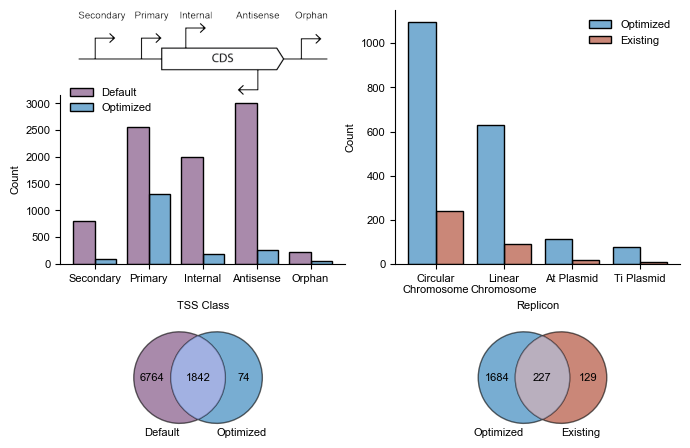

In [8]:
fig = plt.figure(figsize=(8,5.5))
gs1 = gridspec.GridSpec(5,9,hspace=0.0,wspace=-0.20)
gs2 = gridspec.GridSpec(5,9,hspace=-0.3,wspace=0.0)

ax = fig.add_subplot(gs1[0,:4])
ax.imshow(plt.imread(f'{OUT_DIR}/tss_layout.png'))
plt.axis('off')

ax = fig.add_subplot(gs1[1:3,:4])
tss_df['TSS_class'] = tss_df['TSS_class'].apply(lambda x: x.capitalize())
tss_df['dataset'] = tss_df['dataset'].apply(lambda x: x.capitalize())
g = sns.histplot(data=tss_df.query('biovar == "BV1"'),x='TSS_class',hue='dataset',shrink=0.8,multiple='dodge',hue_order=['Default','Optimized'],palette=[color1,color2],alpha=0.6,ax=ax)
g.set_xlabel('\nTSS Class')

sns.move_legend(g, 'upper left',bbox_to_anchor=(0.0, 1.10))
g.legend_.set_title(None)
g.legend_.set_frame_on(False)
sns.despine()

ax = fig.add_subplot(gs1[:3, 5:])
comparison_df['dataset'] = comparison_df['dataset'].apply(lambda x: x.capitalize())
g = sns.histplot(data=comparison_df,x='description',hue='dataset',alpha=0.6,multiple='dodge',shrink=0.8,hue_order=['Optimized','Existing'],palette=[color2,color4],ax=ax)
g.set_xticklabels(['Circular\nChromosome', 'Linear\nChromosome', 'At Plasmid', 'Ti Plasmid'])
g.legend_.set_title(None)
g.legend_.set_frame_on(False)
g.set_xlabel('Replicon')
sns.despine()


ax = fig.add_subplot(gs2[4, :4])
bv1_df = tss_df.query('biovar=="BV1"').copy()
optimized_set = bv1_df.query('dataset=="Optimized"').copy()[['TSS_position','TSS_strand','contig']]
optimized_set = optimized_set['contig'] + '-' + optimized_set['TSS_position'].astype(str) + '-' + optimized_set['TSS_strand']
optimized_set = set(optimized_set)
raw_set = bv1_df.query('dataset=="Default"').copy()[['TSS_position','TSS_strand','contig']]
raw_set = raw_set['contig'] + '-' + raw_set['TSS_position'].astype(str) + '-' + raw_set['TSS_strand']
raw_set = set(raw_set)
v = venn2_unweighted(subsets=(raw_set, optimized_set), set_labels=('Default','Optimized'),set_colors=[color1,color2],alpha=0.6,ax=ax)
ax.margins(x=0,y=0)
v.patches[0].set_edgecolor("black")
v.patches[0].set_lw(1)
v.patches[1].set_edgecolor("black")
v.patches[1].set_lw(1)
for text in v.set_labels:
    text.set_fontsize(8)
for text in v.subset_labels:
    text.set_fontsize(8)

ax = fig.add_subplot(gs2[4, 5:])
val = set(val_df.apply(lambda row: f'{row["contig"]}-{row["rounded_position"]}-{row["TSS_strand"]}',axis=1))
test = set(test_df.apply(lambda row: f'{row["contig"]}-{row["rounded_position"]}-{row["TSS_strand"]}',axis=1))
v = venn2_unweighted(subsets=(test,val), set_labels=('Optimized','Existing'),set_colors=[color2,color4],alpha=0.6,ax=ax)
ax.margins(x=0,y=0)
v.patches[0].set_edgecolor("black")
v.patches[0].set_lw(1)
v.patches[1].set_edgecolor("black")
v.patches[1].set_lw(1)
for text in v.set_labels:
    text.set_fontsize(8)
for text in v.subset_labels:
    text.set_fontsize(8)

fig.savefig(f'{OUT_DIR}/03-fig2.png',dpi=600,transparent=True,bbox_inches='tight')

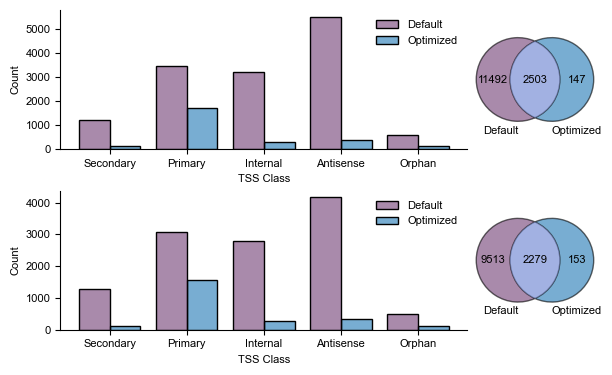

In [9]:
fig = plt.figure(figsize=(7,6.5))
gs = gridspec.GridSpec(3,4,hspace=0.3,wspace=0.0)

ax = fig.add_subplot(gs[0, :3])
g = sns.histplot(data=tss_df.query('biovar == "BV2"'),x='TSS_class',hue='dataset',shrink=0.8,multiple='dodge',hue_order=['Default','Optimized'],palette=[color1,color2],alpha=0.6,ax=ax)
# g.set_yticks(range(0,6000,1000))
g.legend_.set_title(None)
g.legend_.set_frame_on(False)
g.set_xlabel('TSS Class')
# g.set_title(r'$\it{R. rhizogenes}$ C16/80')
sns.despine()

ax = fig.add_subplot(gs[0, 3:])
raw_set = set(tss_df.query('dataset == "Default" and biovar == "BV2"').apply(lambda row: f"{row['biovar']}-{row['contig']}-{row['TSS_position']}-{row['TSS_strand']}",axis=1))
op_set = set(tss_df.query('dataset == "Optimized" and biovar == "BV2"').apply(lambda row: f"{row['biovar']}-{row['contig']}-{row['TSS_position']}-{row['TSS_strand']}",axis=1))
v = venn2_unweighted(subsets=(raw_set, op_set), set_labels=('Default','Optimized'),set_colors=[color1,color2],alpha=0.6,ax=ax)
ax.margins(x=0,y=0)
v.patches[0].set_edgecolor("black")
v.patches[0].set_lw(1)
v.patches[1].set_edgecolor("black")
v.patches[1].set_lw(1)
for text in v.set_labels:
    text.set_fontsize(8)
for text in v.subset_labels:
    text.set_fontsize(8)

ax = fig.add_subplot(gs[1, :3])
g = sns.histplot(data=tss_df.query('biovar == "BV3"'),x='TSS_class',hue='dataset',shrink=0.8,multiple='dodge',hue_order=['Default','Optimized'],palette=[color1,color2],alpha=0.6,ax=ax)
g.set_yticks(range(0,5000,1000))
g.legend_.set_title(None)
g.legend_.set_frame_on(False)
g.set_xlabel('TSS Class')
# g.set_title(r'$\it{A. vitis}$ T60/94')
sns.despine()

ax = fig.add_subplot(gs[1, 3:])
raw_set = set(tss_df.query('dataset == "Default" and biovar == "BV3"').apply(lambda row: f"{row['biovar']}-{row['contig']}-{row['TSS_position']}-{row['TSS_strand']}",axis=1))
op_set = set(tss_df.query('dataset == "Optimized" and biovar == "BV3"').apply(lambda row: f"{row['biovar']}-{row['contig']}-{row['TSS_position']}-{row['TSS_strand']}",axis=1))
v = venn2_unweighted(subsets=(raw_set, op_set), set_labels=('Default','Optimized'),set_colors=[color1,color2],alpha=0.6,ax=ax)
ax.margins(x=0,y=0)
v.patches[0].set_edgecolor("black")
v.patches[0].set_lw(1)
v.patches[1].set_edgecolor("black")
v.patches[1].set_lw(1)
for text in v.set_labels:
    text.set_fontsize(8)
for text in v.subset_labels:
    text.set_fontsize(8)

fig.savefig(f'{OUT_DIR}/03-optimization_supplement.png',dpi=600,transparent=True,bbox_inches='tight')
